 
 
     3Homework solution:    ML02_EDA
                   By:    K Dehnad

In [44]:
# pip install ydata-profiling --user

In [45]:
# !pip install numpy==2.0.2


In [46]:
!python --version


Python 3.12.7


In [47]:
!pip list


Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base    

In [48]:
# pip install pydantic-settings

In [49]:
# pip install ydata-profiling

In [50]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


Iris_modified data dictionary 
SepalLength     Int64
SepalWidth      Int64
PetalLength     Int64
PetalWidth      Int64
Species         str

In [52]:
# Load the data into a pandas dataframe

coltype={'SepalLength':'Int64' , 'SepalWidth':'Int64','PetalLength':'Int64', 'PetalWidth':'Int64', 'Species':'str' }
folder='C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/'

df = pd.read_csv('iris_modified.csv')


df.head()
# df.tail(10)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,50,33,14,2,Setosa
1,46,34,?,3,Setosa
2,46,36,10,2,Setosa
3,51,33,17,5,Setosa
4,55,35,13,2,Setosa


In [53]:
print(df.dtypes)

SepalLength     int64
SepalWidth      int64
PetalLength    object
PetalWidth      int64
Species        object
dtype: object


In [54]:


# Compute the minimum, maximum, and mean of each numeric column

# Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
# Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
Min_Max_Mean=df.describe().loc[["min", "max", "mean"]]
print(Min_Max_Mean)



       SepalLength  SepalWidth  PetalWidth
count   150.000000  150.000000  150.000000
mean     58.633333   30.280000   12.066667
std       8.662514    4.827383    7.716162
min      43.000000   18.000000    1.000000
25%      51.000000   28.000000    3.000000
50%      58.000000   30.000000   13.000000
75%      64.000000   33.000000   18.000000
max      85.000000   45.000000   35.000000

 min, max, mean only
      SepalLength  SepalWidth  PetalWidth
min     43.000000       18.00    1.000000
max     85.000000       45.00   35.000000
mean    58.633333       30.28   12.066667


In [55]:

profile = ProfileReport(df, title="Profiling data frame")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
# print(df.isnull())
missing_values =df.isnull().sum()
print(missing_values)
 

Empty DataFrame
Columns: [SepalLength, SepalWidth, PetalLength, PetalWidth, Species]
Index: []
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


In [57]:


# # # Replace missing values with the mean of the column
df['PetalLength'].fillna(df['PetalLength'].mean().round(),inplace=True)
#df['PetalLength']=df['PetalLength'].fillna(df['PetalLength'].mean().round())

# df.fillna(df.mean(), inplace=True)
print("\n check for missing value again")
print(df.isnull().sum())
print(df[df.isna().any(axis=1)])


TypeError: Could not convert string '14?1017131614141316131614161916121112191414161415141515?151715141315151315?131416141317151715151546454846513945474745403845404433444541453542334242463945353739434240474441494743304147364940404448505656515152555159546757664552515053645767496049565648615651585955485669505761496358585461515355505160' to numeric

In [ ]:
#IV.	Displaying the frequency table of “PetalLength” vs. Species

freq_table = pd.crosstab(df['PetalLength'], df['Species'])
print(freq_table)

Species      Setosa  Versicolor  Virginica
PetalLength                               
10                1           0          0
11                1           0          0
12                2           0          0
13                7           0          0
14               11           0          0
15               12           0          0
16                7           0          0
17                4           0          0
19                2           0          0
30                0           1          0
33                0           2          0
35                0           2          0
36                0           1          0
37                0           1          0
38                0           1          0
39                0           3          0
40                0           5          0
41                0           3          0
42                0           4          0
43                0           2          0
44                0           4          0
45         

In [ ]:
%matplotlib inline

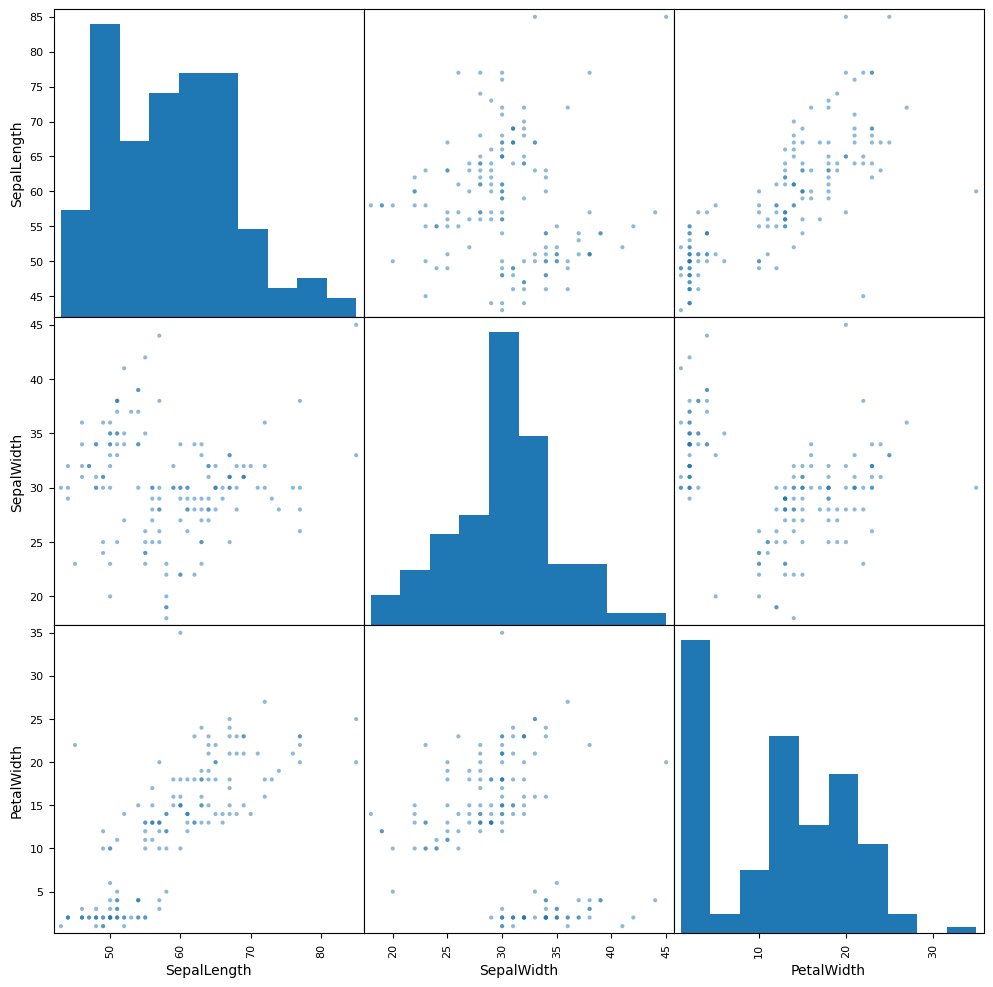

In [ ]:
# # Displaying the scatter plot of  	SepalLength	SepalWidth	PetalLength	PetalWidth	Species, one pair at a time
# # Create scatter plot matrix

pd.plotting.scatter_matrix(df[['SepalLength','SepalWidth',  'PetalLength', 'PetalWidth']], figsize=(12,12), diagonal='hist')
# pd.plotting.scatter_matrix(df.loc[:, 'SepalLength':'PetalWidth'], figsize=(12,12), diagonal='hist')

# Show plot
plt.show()

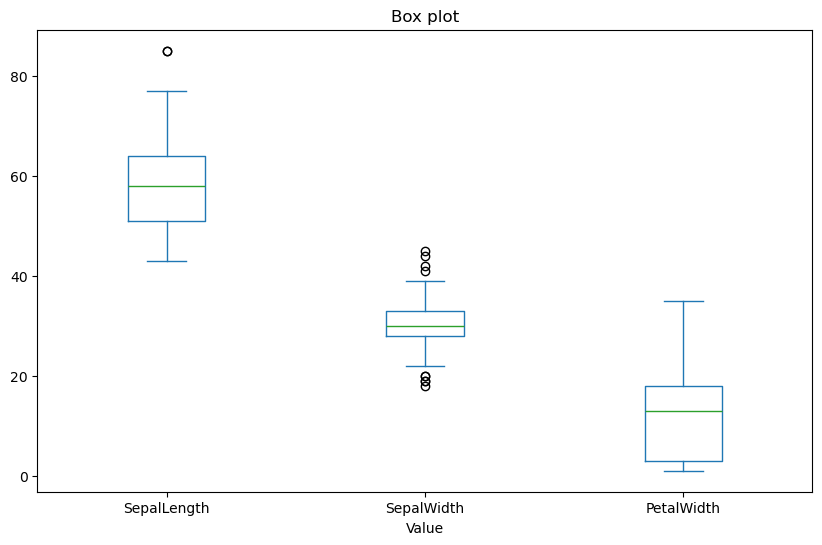

In [58]:
# Create a box plot
df[['SepalLength','SepalWidth',  'PetalLength', 'PetalWidth']].plot(kind="box", vert=True, figsize=(10, 6))
# subset=df.loc[:, 'SepalLength':'SepalWidth']
# subset.plot(kind="box", vert=True, figsize=(10, 6))
plt.title("Box plot", fontsize=12)
plt.xlabel("Value")
plt.show()

In [59]:
df2=df.drop('Species',axis=1)
df2.head()
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df2 < lower_bound) | (df2 > upper_bound)
df2['Outlier']=outliers.any(axis=1)
df2.head()
filtered_df = df2[df2['Outlier'] == True]  
print(filtered_df)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [60]:
# develop your regresion model
from statsmodels.formula.api import ols
res = ols(
    ' PetalWidth ~ SepalLength',
    data=df,
).fit()

In [61]:
 # develop prediction for the original predictors
predictions = res.get_prediction(df['SepalLength'])
predict_df = predictions.summary_frame(alpha=.05)
predict_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.983117,0.546856,4.902463,7.063771,-3.437942,15.404176
1,3.164484,0.685347,1.810154,4.518813,-6.291876,12.620844
2,3.164484,0.685347,1.810154,4.518813,-6.291876,12.620844
3,6.687775,0.516158,5.667784,7.707767,-2.726518,16.102069
4,9.506408,0.419538,8.677349,10.335467,0.110884,18.901933


In [62]:
outliers = (df['PetalWidth'] < predict_df['obs_ci_lower']) | (df['PetalWidth'] > predict_df['obs_ci_upper'])
df['outlier'] = outliers
df.tail(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,outlier
130,71,30,59,21,Virginica,False
131,64,31,55,18,Virginica,False
132,60,30,48,18,Virginica,False
133,63,29,56,18,Virginica,False
134,77,26,69,23,Virginica,False
135,60,22,50,15,Virginica,False
136,69,32,57,23,Virginica,False
137,74,28,61,19,Virginica,False
138,56,28,49,17,Virginica,False
139,73,29,63,18,Virginica,False


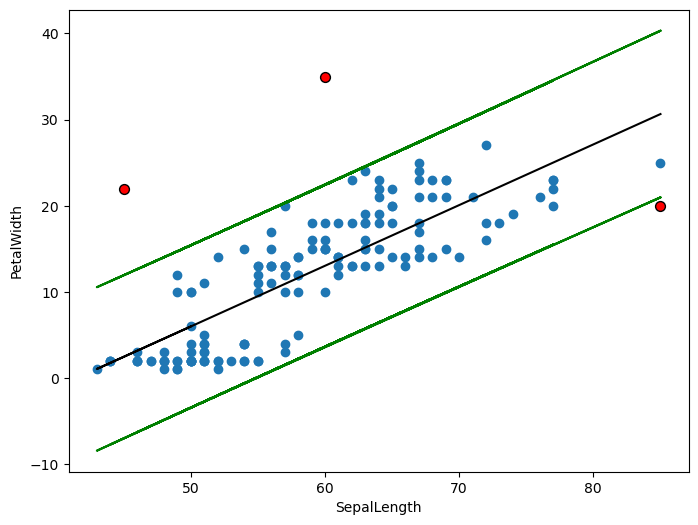

Outliers:
     SepalLength  SepalWidth PetalLength  PetalWidth    Species  outlier
43            45          23          13          22     Setosa     True
117           85          45          64          20  Virginica     True
148           60          30          51          35  Virginica     True


In [63]:



# # Plot results
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLength'], df['PetalWidth'], label='df')
plt.plot(df['SepalLength'], predict_df['mean'] , color='black', label='Regression Line')
plt.plot(df['SepalLength'], predict_df['obs_ci_lower'] , color='green', label='Regression Line')
plt.plot(df['SepalLength'], predict_df['obs_ci_upper'] , color='green', label='Regression Line')
plt.scatter(df.loc[outliers, 'SepalLength' ], df.loc[outliers,'PetalWidth'  ], color='red', label='Outliers', edgecolors='k', s=50)
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')
# plt.legend()
# plt.title('Regression with 95% Confidence Interval and Outliers')
plt.show()

# Print identified outliers
print("Outliers:")
print(df.loc[outliers])